<a href="https://colab.research.google.com/github/Victor-B-Canut/Vis-o-natural-e-artificial/blob/main/Mumford_Shah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

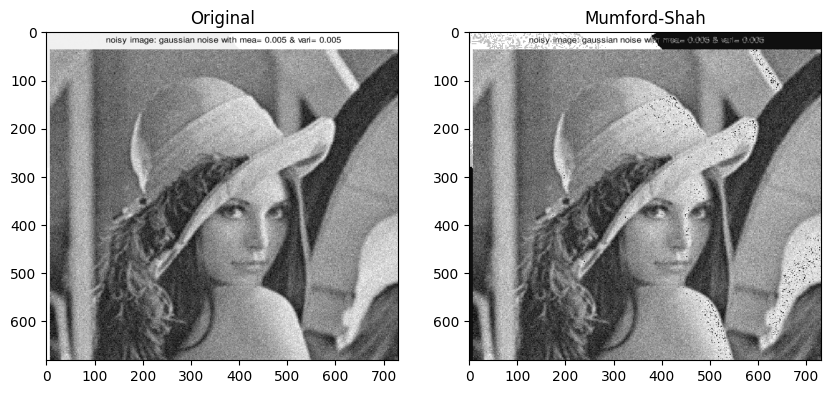

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gradient_magnitude(img):
    gx = np.gradient(img, axis=0)
    gy = np.gradient(img, axis=1)
    return np.sqrt(gx**2 + gy**2)

def mumford_shah_denoising(img, num_iter, lambda_, mu, dt):
    img = img.astype(np.float32) / 255.0
    u = img.copy()

    gu= np.gradient(u)

    for _ in range(num_iter):
        u_old = u.copy()
        gradient_u = gradient_magnitude(u)

        u = u - dt * (u - img - lambda_ * (u - img / 255) * (1 - gradient_u) - mu * gradient_u * gu)

        if np.linalg.norm(u - u_old) < 1e-3:
            break

    return (u * 255).astype(np.uint8)


input_image = cv2.imread('/content/drive/MyDrive/Images/Noisy-image.png', cv2.IMREAD_GRAYSCALE)

num_iter = 100
lambda_ = 0.1
mu = 0.1
dt = 0.01


denoised_image = mumford_shah_denoising(input_image, num_iter, lambda_, mu, dt)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Mumford-Shah')
plt.imshow(denoised_image, cmap='gray')
plt.show()


<ipython-input-2-b80d4b09946a>:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/drive/MyDrive/Images/folhas.png', mode='L')  # Ensure 'example_image.png' is in the working directory


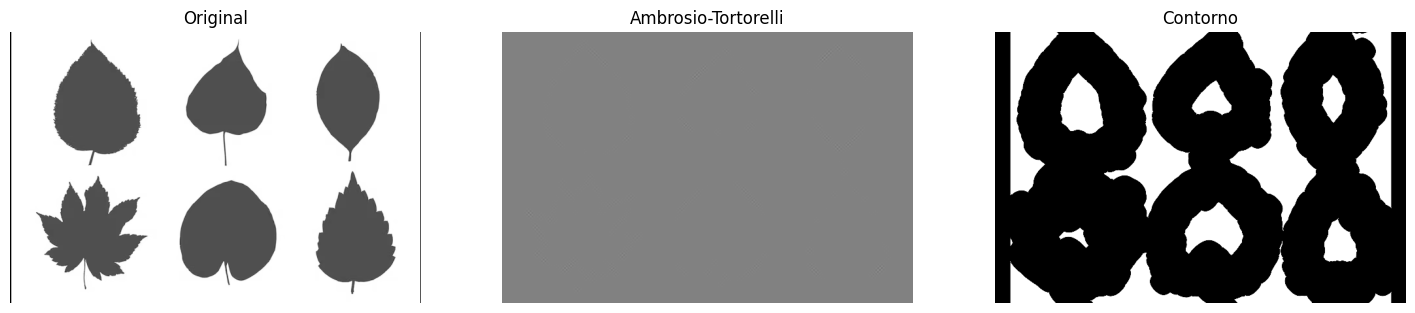

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def compute_gradients(u):
    grad_u_x = np.roll(u, -1, axis=1) - u
    grad_u_y = np.roll(u, -1, axis=0) - u
    return grad_u_x, grad_u_y

def compute_divergence(grad_u_x, grad_u_y):
    div_u = np.roll(grad_u_x, 1, axis=1) - grad_u_x + np.roll(grad_u_y, 1, axis=0) - grad_u_y
    return div_u

def ambrosio_tortorelli_denoising(img, alpha, epsilon, dt, iterations):
    u = img.copy()
    v = np.ones_like(img)

    for _ in range(iterations):
        # Compute gradients
        grad_u_x, grad_u_y = compute_gradients(u)
        grad_v_x, grad_v_y = compute_gradients(v)

        # Compute divergence
        div_u = compute_divergence(grad_u_x, grad_u_y)
        div_v = compute_divergence(grad_v_x, grad_v_y)

        # Update u
        u += dt * (div_u - (u - img) + alpha * v * (img - u))



        # Update v
        v += dt * (epsilon * div_v - alpha * (img - u)**2 * v)
        v = np.clip(v, 0, 1)
    return u, v

# Load an example image
img = imageio.imread('/content/drive/MyDrive/Images/folhas.png', mode='L')  # Ensure 'example_image.png' is in the working directory

# Normalize the image
img = img / 255.0

# Apply Ambrosio-Tortorelli denoising
alpha = 5
epsilon = 1e-3
dt = 0.1
iterations = 100

uf, vf = ambrosio_tortorelli_denoising(img, alpha, epsilon, dt, iterations)

uf2, vf2 = ambrosio_tortorelli_denoising(img, alpha, epsilon, dt, 50)

# Display the original, denoised images, and edge indicator
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ambrosio-Tortorelli')
plt.imshow(uf, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Contorno')
plt.imshow(vf, cmap='gray')
plt.axis('off')

plt.show()


<ipython-input-14-04dbda63f6d8>:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/drive/MyDrive/Images/folhas.png', mode='L')  # Ensure 'example_image.png' is in the working directory


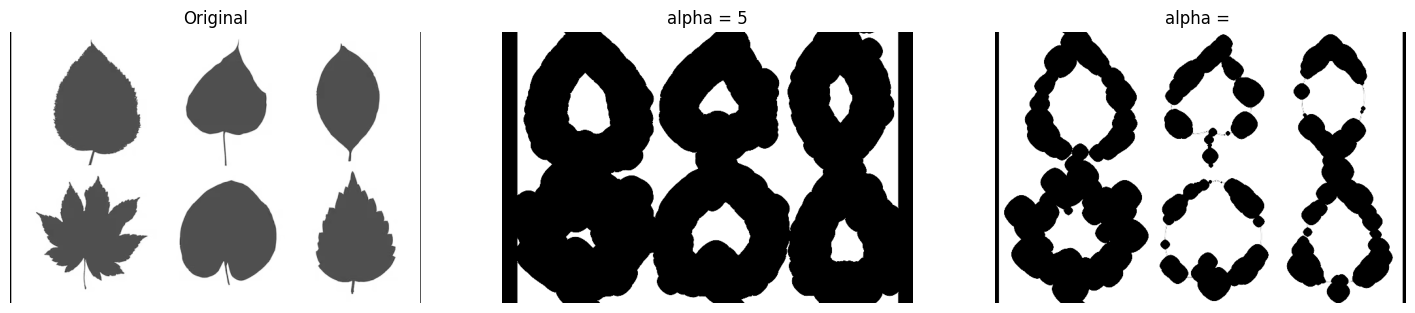

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def compute_gradients(u):
    grad_u_x = np.roll(u, -1, axis=1) - u
    grad_u_y = np.roll(u, -1, axis=0) - u
    return grad_u_x, grad_u_y

def compute_divergence(grad_u_x, grad_u_y):
    div_u = np.roll(grad_u_x, 1, axis=1) - grad_u_x + np.roll(grad_u_y, 1, axis=0) - grad_u_y
    return div_u

def ambrosio_tortorelli_denoising(img, alpha, epsilon, dt, iterations):
    u = img.copy()
    v = np.ones_like(img)

    for _ in range(iterations):
        # Compute gradients
        grad_u_x, grad_u_y = compute_gradients(u)
        grad_v_x, grad_v_y = compute_gradients(v)

        # Compute divergence
        div_u = compute_divergence(grad_u_x, grad_u_y)
        div_v = compute_divergence(grad_v_x, grad_v_y)

        # Update u
        u += dt * (div_u - (u - img) + alpha * v * (img - u))



        # Update v
        v += dt * (epsilon * div_v - alpha * (img - u)**2 * v)
        v = np.clip(v, 0, 1)
    return u, v

# Load an example image
img = imageio.imread('/content/drive/MyDrive/Images/folhas.png', mode='L')  # Ensure 'example_image.png' is in the working directory

# Normalize the image
img = img / 255.0

# Apply Ambrosio-Tortorelli  for different alpha
epsilon = 1e-3
dt = 0.1
iterations = 100

uf, vf = ambrosio_tortorelli_denoising(img, 5, epsilon, dt, iterations)

uf2, vf2 = ambrosio_tortorelli_denoising(img, 17, epsilon, dt, 100)

# Display the original, denoised images, and edge indicator
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('alpha = 5')
plt.imshow(vf, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('alpha = 17')
plt.imshow(vf2, cmap='gray')
plt.axis('off')

plt.show()
